In [2]:
pip install Historic-Crypto

Note: you may need to restart the kernel to use updated packages.


In [16]:
# https://stackoverflow.com/questions/51417285/coinbase-api-v2-getting-historic-price-for-multiple-days

from Historic_Crypto import HistoricalData
new = HistoricalData('ETH-USD',60,'2022-12-17-00-00').retrieve_data()

Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'ETH-USD' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2022-12-17T00:00:00
Provisional End: 2022-12-17T05:00:00
Data for chunk 1 of 3 extracted


/opt/conda/lib/python3.7/site-packages/cryptography/hazmat/backends/openssl/x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,


Provisional Start: 2022-12-17T05:00:00
Provisional End: 2022-12-17T10:00:00
Data for chunk 2 of 3 extracted
Provisional Start: 2022-12-17T10:00:00
Provisional End: 2022-12-17T15:00:00
Data for chunk 3 of 3 extracted


<AxesSubplot:xlabel='time'>

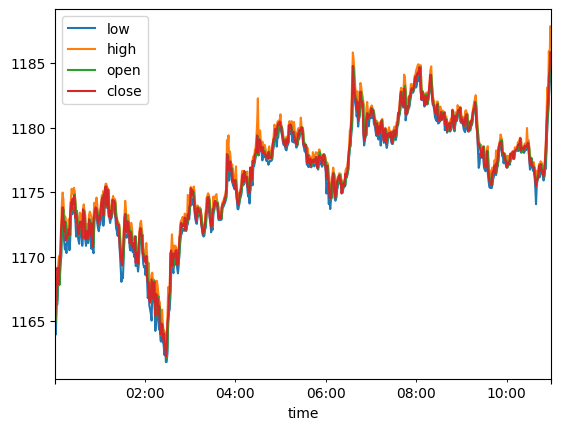

In [26]:
import pandas as pd

new[[col for col in new.columns if col != "volume"]].plot()

In [3]:
pip install google-cloud-aiplatform --user

  Using cached google_cloud_aiplatform-1.20.0-py2.py3-none-any.whl (2.3 MB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached google_cloud_bigquery-2.34.4-py2.py3-none-any.whl (206 kB)
  Using cached google_cloud_resource_manager-1.7.0-py2.py3-none-any.whl (235 kB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/opt/conda/lib/python3.7/site-packages/six-1.16.0.dist-info/METADATA'

Note: you may need to restart the kernel to use updated packages.


In [1]:
from google.cloud import aiplatform_v1beta1
from google.protobuf import json_format
from google.protobuf.struct_pb2 import Value

def create_batch_prediction_job_bigquery_sample(
    project: str,
    display_name: str,
    model_name: str,
    instances_format: str,
    bigquery_source_input_uri: str,
    predictions_format: str,
    bigquery_destination_output_uri: str,
    location: str = "us-central1",
    api_endpoint: str = "us-central1-aiplatform.googleapis.com",
):
    # The AI Platform services require regional API endpoints.
    client_options = {"api_endpoint": api_endpoint}
    # Initialize client that will be used to create and send requests.
    # This client only needs to be created once, and can be reused for multiple requests.
    client = aiplatform_v1beta1.JobServiceClient(client_options=client_options)
    model_parameters_dict = {}
    model_parameters = json_format.ParseDict(model_parameters_dict, Value())

    batch_prediction_job = {
        "display_name": display_name,
        # Format: 'projects/{project}/locations/{location}/models/{model_id}'
        "model": model_name,
        "model_parameters": model_parameters,
        "input_config": {
            "instances_format": instances_format,
            "bigquery_source": {"input_uri": bigquery_source_input_uri},
        },
        "output_config": {
            "predictions_format": predictions_format,
            "bigquery_destination": {"output_uri": bigquery_destination_output_uri},
        },
        # optional
        "generate_explanation": True,
    }
    parent = f"projects/{project}/locations/{location}"
    response = client.create_batch_prediction_job(
        parent=parent, batch_prediction_job=batch_prediction_job
    )
    print("response:", response)

ImportError: cannot import name 'aiplatform_v1beta1' from 'google.cloud' (unknown location)

In [28]:
project: str = "project-daisuke-318402"
display_name: str = "eth"
model_name: str = "eth"
instances_format: str = "csv"
bigquery_source_input_uri: str =['gs://path/to/my/fileaiplatform_v1beta1csv']
predictions_format: str = "csv"
bigquery_destination_output_uri: str  = 'project-daisuke-318402.eth.output1'

In [32]:
create_batch_prediction_job_bigquery_sample(project,
    display_name,
    model_name,
    instances_format,
    bigquery_source_input_uri,
    predictions_format,
    bigquery_destination_output_uri)

NameError: name 'aiplatform_v1beta1' is not defined